In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the data

df = pd.read_csv('kaggle_survey_2020_responses.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# Checking the data out 
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool.

In [ ]:
df.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5',
       'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9',
       'Q35_B_Part_10', 'Q35_B_OTHER'],
      dtype='object', length=355)

In [ ]:
df.Q4.value_counts(normalize=True)*100

Master’s degree                                                                                                    40.158406
Bachelor’s degree                                                                                                  35.656617
Doctoral degree                                                                                                    11.762902
Some college/university study without earning a bachelor’s degree                                                   5.579969
Professional degree                                                                                                 3.571794
I prefer not to answer                                                                                              2.038835
No formal education past high school                                                                                1.226367
What is the highest level of formal education that you have attained or plan to attain within the next 2 years?     0.005110


So mostly there is people with masters degree 

In [ ]:
df.Q5.value_counts(normalize=True)*100

Student                                                                                                    26.823322
Data Scientist                                                                                             13.881108
Software Engineer                                                                                          10.208528
Other                                                                                                       9.010271
Currently not employed                                                                                      8.569354
Data Analyst                                                                                                7.651209
Research Scientist                                                                                          6.089843
Machine Learning Engineer                                                                                   5.612615
Business Analyst                                                

Students and Data Scientists constitute the top 2 spots for the users

In [ ]:
df.Q3.value_counts(normalize=True)*100

India                                                   29.200978
United States of America                                11.164346
Other                                                    6.927185
Brazil                                                   3.463592
Japan                                                    3.184109
Russia                                                   2.904626
United Kingdom of Great Britain and Northern Ireland     2.440485
Nigeria                                                  2.375605
China                                                    2.365624
Germany                                                  2.016270
Turkey                                                   1.716824
Spain                                                    1.676898
France                                                   1.646953
Canada                                                   1.502221
Indonesia                                                1.447322
Pakistan  

India and USA occupy the top 2 spots for most number of users.

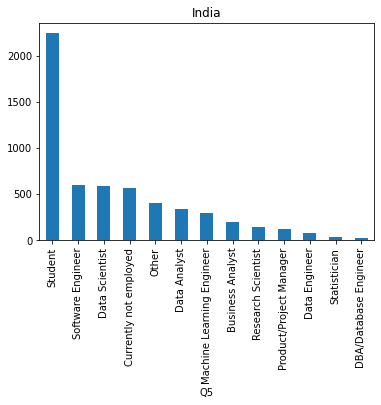

In [ ]:
dfi = df[df['Q3'] == 'India']
dfu = df[df['Q3'] == 'United States of America']

dfi.groupby(['Q5'])['Q5'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('India');

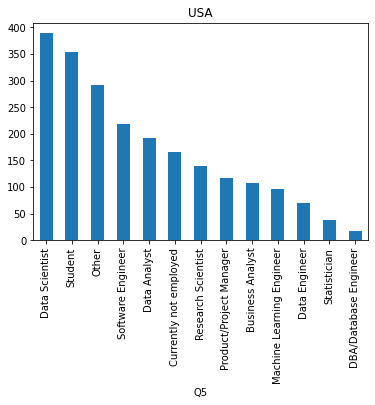

In [ ]:
dfu.groupby(['Q5'])['Q5'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('USA');

In [ ]:
# df['Time from Start to Finish (seconds)'] = df['Time from Start to Finish (seconds)'].astype('int')
# df.groupby(['Q5'])['Time from Start to Finish (seconds)'].mean().sort_values(ascending=False).plot(kind='bar')

In [ ]:
# Using different age groups to do the analysis 
df['Q1'].value_counts()

25-29                          4011
22-24                          3786
18-21                          3469
30-34                          2811
35-39                          1991
40-44                          1397
45-49                           988
50-54                           698
55-59                           411
60-69                           398
70+                              76
What is your age (# years)?       1
Name: Q1, dtype: int64

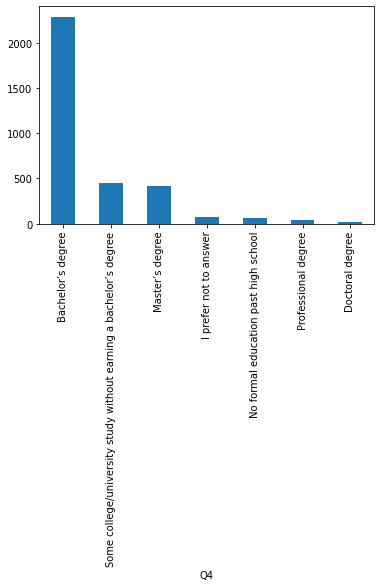

In [ ]:
df1821 = df[df['Q1'] == '18-21']
df1821.groupby(['Q4'])['Q4'].count().sort_values(ascending = False).plot(kind = 'bar')

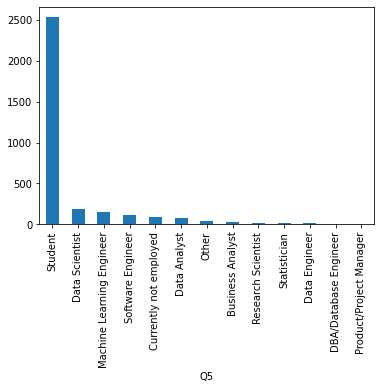

In [ ]:
df1821.groupby(['Q5'])['Q5'].count().sort_values(ascending = False).plot(kind = 'bar')

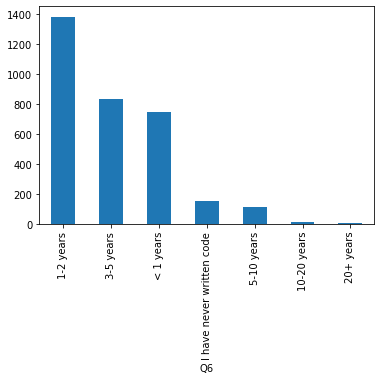

In [ ]:
df1821.groupby(['Q6'])['Q6'].count().sort_values(ascending = False).plot(kind = 'bar')

In [ ]:
q7_columns = [df1821.Q7_Part_1,df1821.Q7_Part_2,df1821.Q7_Part_3,df1821.Q7_Part_4,
             df1821.Q7_Part_5,df1821.Q7_Part_6,df1821.Q7_Part_7,df1821.Q7_Part_8,
             df1821.Q7_Part_9, df1821.Q7_Part_10, df1821.Q7_Part_11, df1821.Q7_Part_12,
             df1821.Q7_OTHER]
Q7_data = pd.concat(q7_columns)

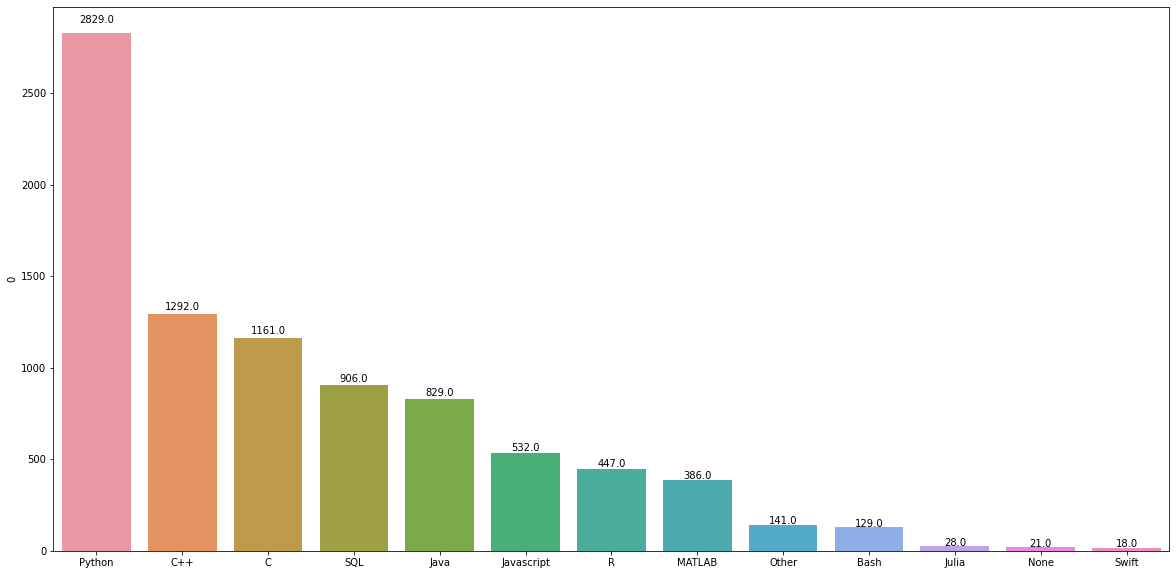

In [ ]:
plt.figure(figsize=(20,10))
Q7_count = Q7_data.value_counts().sort_values(ascending=False).to_frame()
ax = sns.barplot(x=Q7_count.index, y=Q7_count.iloc[:,0], data=Q7_count)
#ax = df_india.groupby(['Q6'])['Q6'].count().sort_values().plot(kind='bar')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

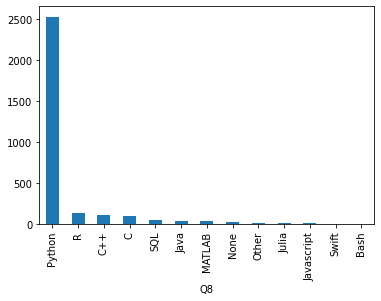

In [ ]:
df1821.groupby(['Q8'])['Q8'].count().sort_values(ascending = False).plot(kind = 'bar')

In [ ]:
# Checking what kind of IDE this age group likes to use

q9_columns = [df1821.Q9_Part_1,df1821.Q9_Part_2,df1821.Q9_Part_3,df1821.Q9_Part_4,
             df1821.Q9_Part_5,df1821.Q9_Part_6,df1821.Q9_Part_7,df1821.Q9_Part_8,
             df1821.Q9_Part_9, df1821.Q9_Part_10, df1821.Q9_Part_11,
             df1821.Q9_OTHER]
Q9_data = pd.concat(q9_columns)


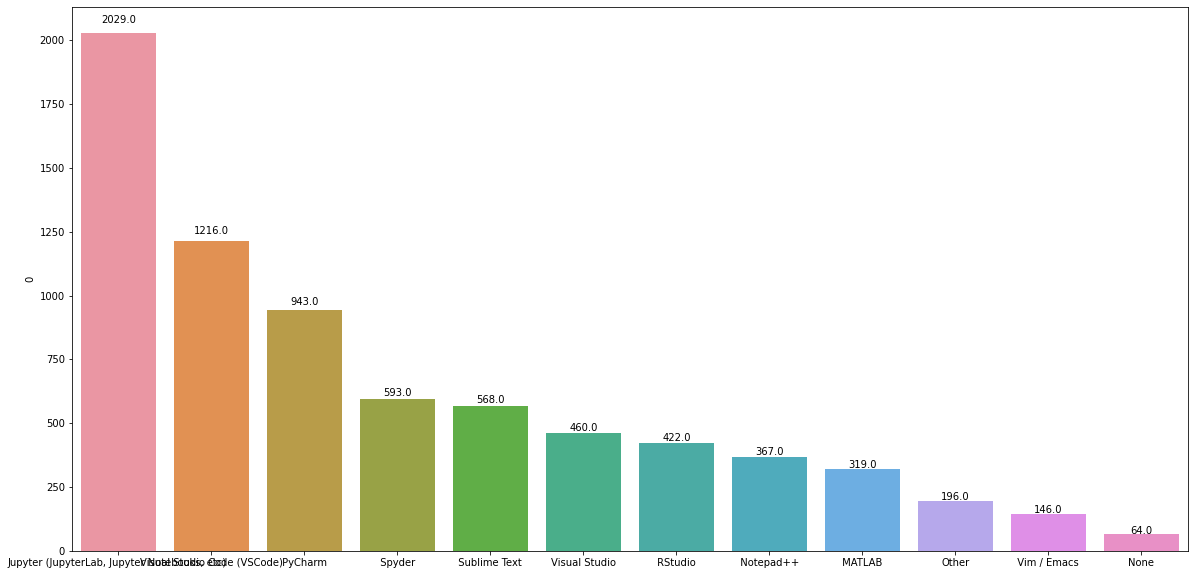

In [ ]:
plt.figure(figsize=(20,10))
Q9_count = Q9_data.value_counts().sort_values(ascending=False).to_frame()
ax = sns.barplot(x=Q9_count.index, y=Q9_count.iloc[:,0], data=Q9_count)
#ax = df_india.groupby(['Q6'])['Q6'].count().sort_values().plot(kind='bar')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

In [ ]:
# Checking what kind of IDE this age group likes to use

Q10_columns = [df1821.Q10_Part_1,df1821.Q10_Part_2,df1821.Q10_Part_3,df1821.Q10_Part_4,
             df1821.Q10_Part_5,df1821.Q10_Part_6,df1821.Q10_Part_7,df1821.Q10_Part_8,
             df1821.Q10_Part_9, df1821.Q10_Part_10, df1821.Q10_Part_11,
             df1821.Q10_OTHER]
Q10_data = pd.concat(Q10_columns)


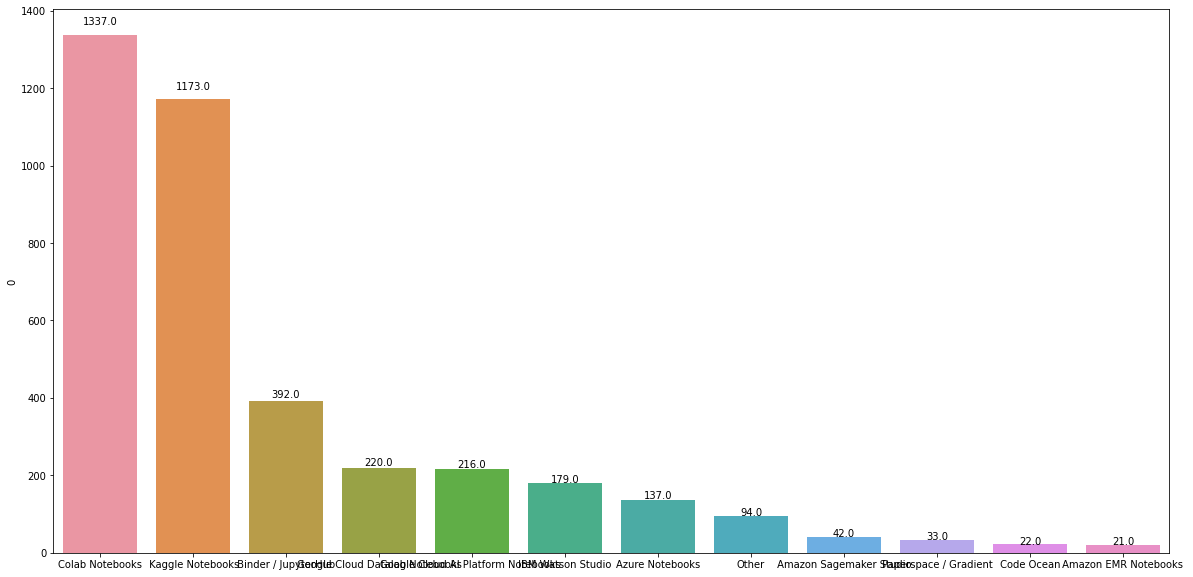

In [ ]:
plt.figure(figsize=(20,10))
Q10_count = Q10_data.value_counts().sort_values(ascending=False).to_frame()
ax = sns.barplot(x=Q10_count.index, y=Q10_count.iloc[:,0], data=Q10_count)
#ax = df_india.groupby(['Q6'])['Q6'].count().sort_values().plot(kind='bar')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')


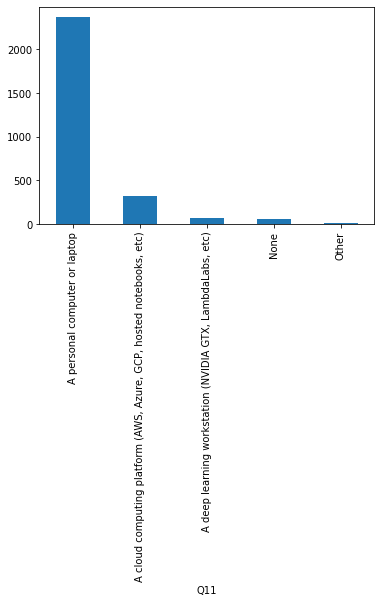

In [ ]:
df1821.groupby(['Q11'])['Q11'].count().sort_values(ascending = False).plot(kind = 'bar')

In [ ]:
# Checking what kind of IDE this age group likes to use

Q12_columns = [df1821.Q12_Part_1,df1821.Q12_Part_2,df1821.Q12_Part_3,
             df1821.Q12_OTHER]
Q12_data = pd.concat(Q12_columns)


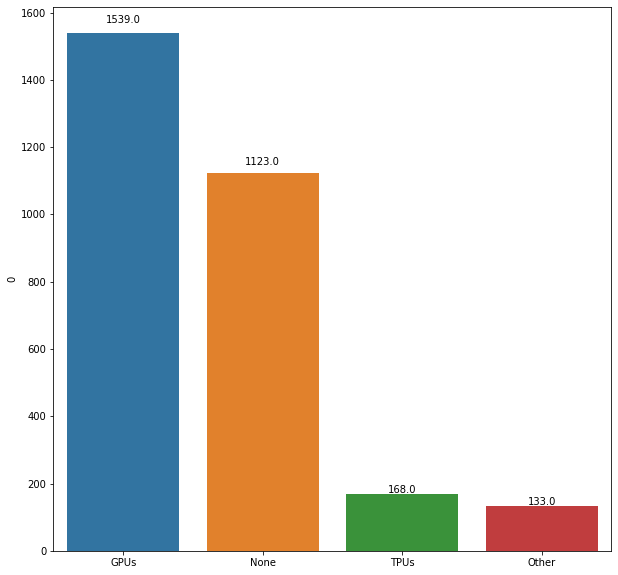

In [ ]:
plt.figure(figsize=(10,10))
Q12_count = Q12_data.value_counts().sort_values(ascending=False).to_frame()
ax = sns.barplot(x=Q12_count.index, y=Q12_count.iloc[:,0], data=Q12_count)
#ax = df_india.groupby(['Q6'])['Q6'].count().sort_values().plot(kind='bar')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')


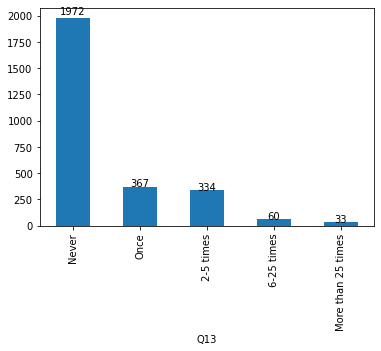

In [ ]:
ax = df1821.groupby(['Q13'])['Q13'].count().sort_values(ascending = False).plot(kind = 'bar')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center');

In [ ]:
# Checking what kind of IDE this age group likes to use

Q14_columns = [df1821.Q14_Part_1,df1821.Q14_Part_2,df1821.Q14_Part_3,df1821.Q14_Part_4,
             df1821.Q14_Part_5,df1821.Q14_Part_6,df1821.Q14_Part_7,df1821.Q14_Part_8,
             df1821.Q14_Part_9, df1821.Q14_Part_10, df1821.Q14_Part_11,
             df1821.Q14_OTHER]
Q14_data = pd.concat(Q14_columns)


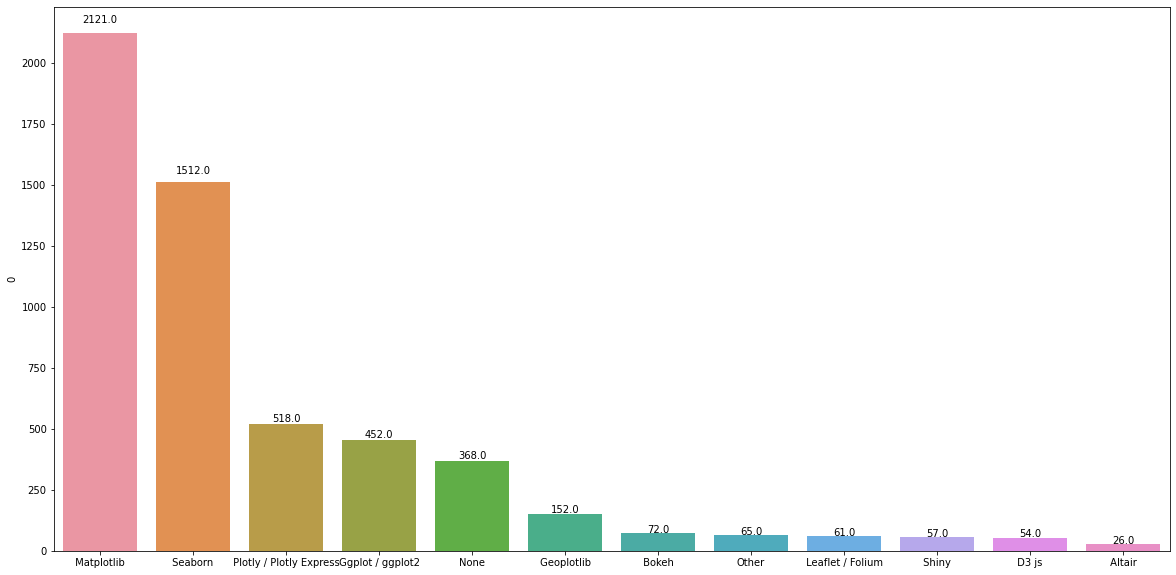

In [ ]:
plt.figure(figsize=(20,10))
Q14_count = Q14_data.value_counts().sort_values(ascending=False).to_frame()
ax = sns.barplot(x=Q14_count.index, y=Q14_count.iloc[:,0], data=Q14_count)
#ax = df_india.groupby(['Q6'])['Q6'].count().sort_values().plot(kind='bar')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')


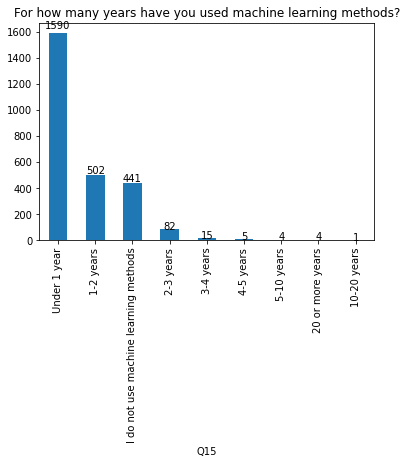

In [ ]:
ax = df1821.groupby(['Q15'])['Q15'].count().sort_values(ascending = False).plot(kind = 'bar',title = 'For how many years have you used machine learning methods?')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center');

In [ ]:
Q16_columns = [df1821.Q16_Part_1,df1821.Q16_Part_2,df1821.Q16_Part_3,df1821.Q16_Part_4,
             df1821.Q16_Part_5,df1821.Q16_Part_6,df1821.Q16_Part_7,df1821.Q16_Part_8,
             df1821.Q16_Part_9, df1821.Q16_Part_10, df1821.Q16_Part_11,
             df1821.Q16_OTHER]
Q16_data = pd.concat(Q16_columns)



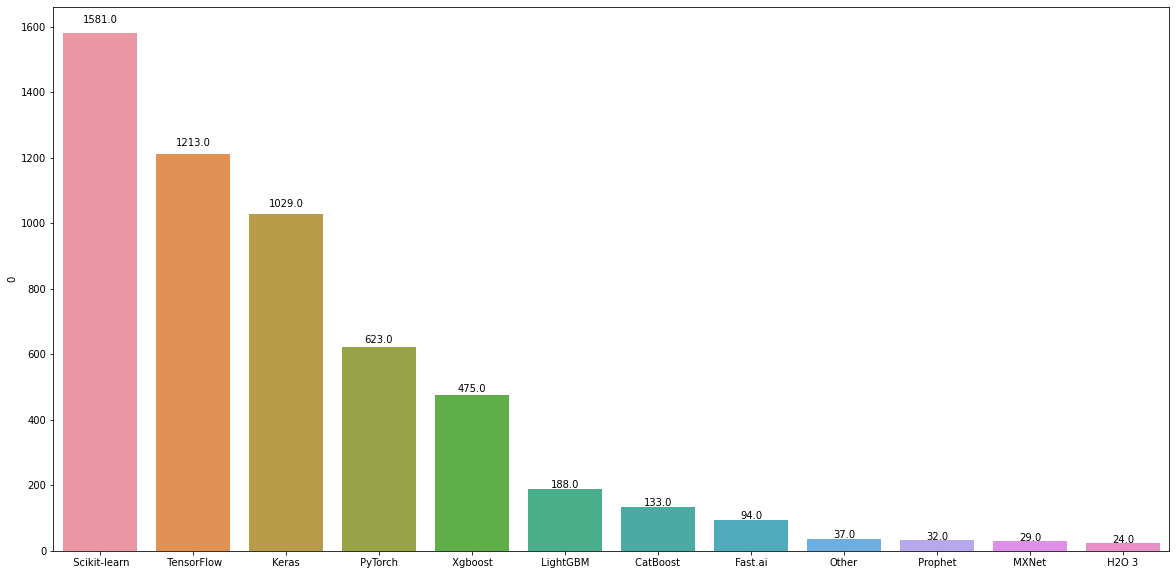

In [ ]:
plt.figure(figsize=(20,10))
Q16_count = Q16_data.value_counts().sort_values(ascending=False).to_frame()
ax = sns.barplot(x=Q16_count.index, y=Q16_count.iloc[:,0], data=Q16_count)
#ax = df_india.groupby(['Q6'])['Q6'].count().sort_values().plot(kind='bar')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')


In [ ]:
Q17_columns = [df1821.Q17_Part_1,df1821.Q17_Part_2,df1821.Q17_Part_3,df1821.Q17_Part_4,
             df1821.Q17_Part_5,df1821.Q17_Part_6,df1821.Q17_Part_7,df1821.Q17_Part_8,
             df1821.Q17_Part_9, df1821.Q17_Part_10, df1821.Q17_Part_11,
             df1821.Q17_OTHER]
Q17_data = pd.concat(Q17_columns)


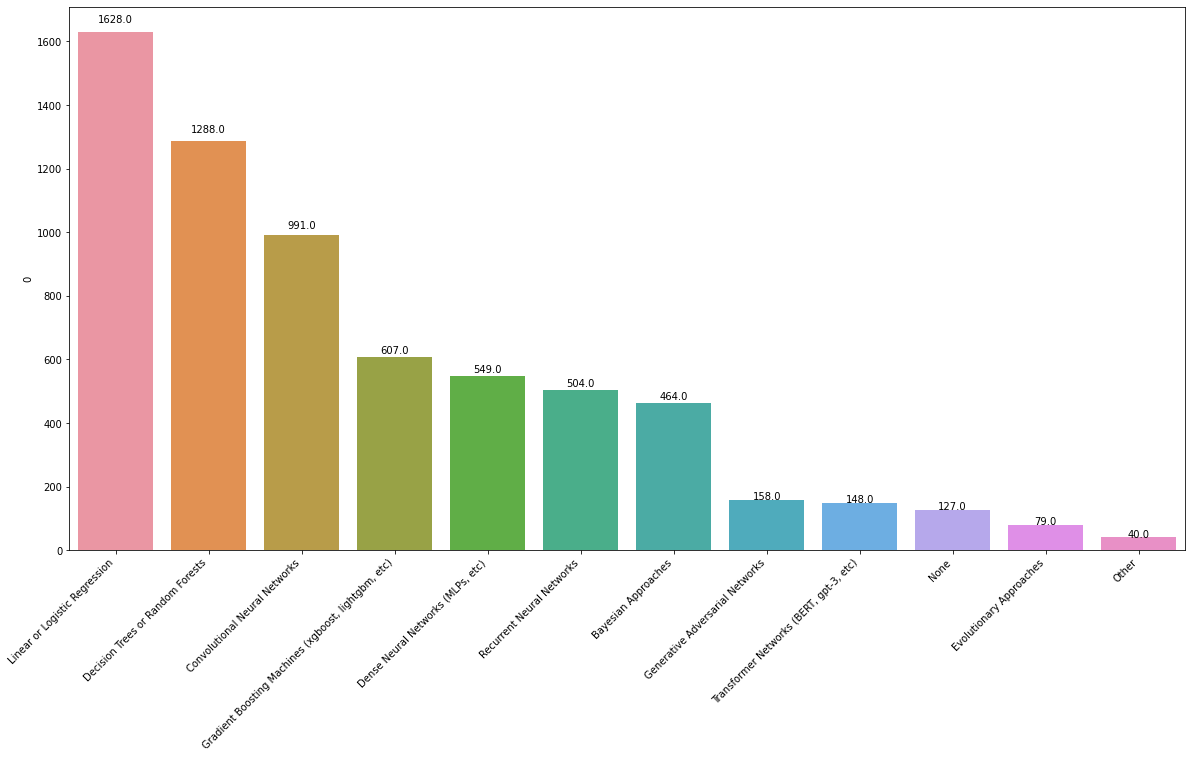

In [ ]:
plt.figure(figsize=(20,10))
Q17_count = Q17_data.value_counts().sort_values(ascending=False).to_frame()
ax = sns.barplot(x=Q17_count.index, y=Q17_count.iloc[:,0], data=Q17_count)
#ax = df_india.groupby(['Q6'])['Q6'].count().sort_values().plot(kind='bar')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=45, ha='right');

In [ ]:
Q18_columns = [df1821.Q18_Part_1,df1821.Q18_Part_2,df1821.Q18_Part_3,df1821.Q18_Part_4,
             df1821.Q18_Part_5,df1821.Q18_Part_6
             ,df1821.Q18_OTHER]
Q18_data = pd.concat(Q18_columns)



(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

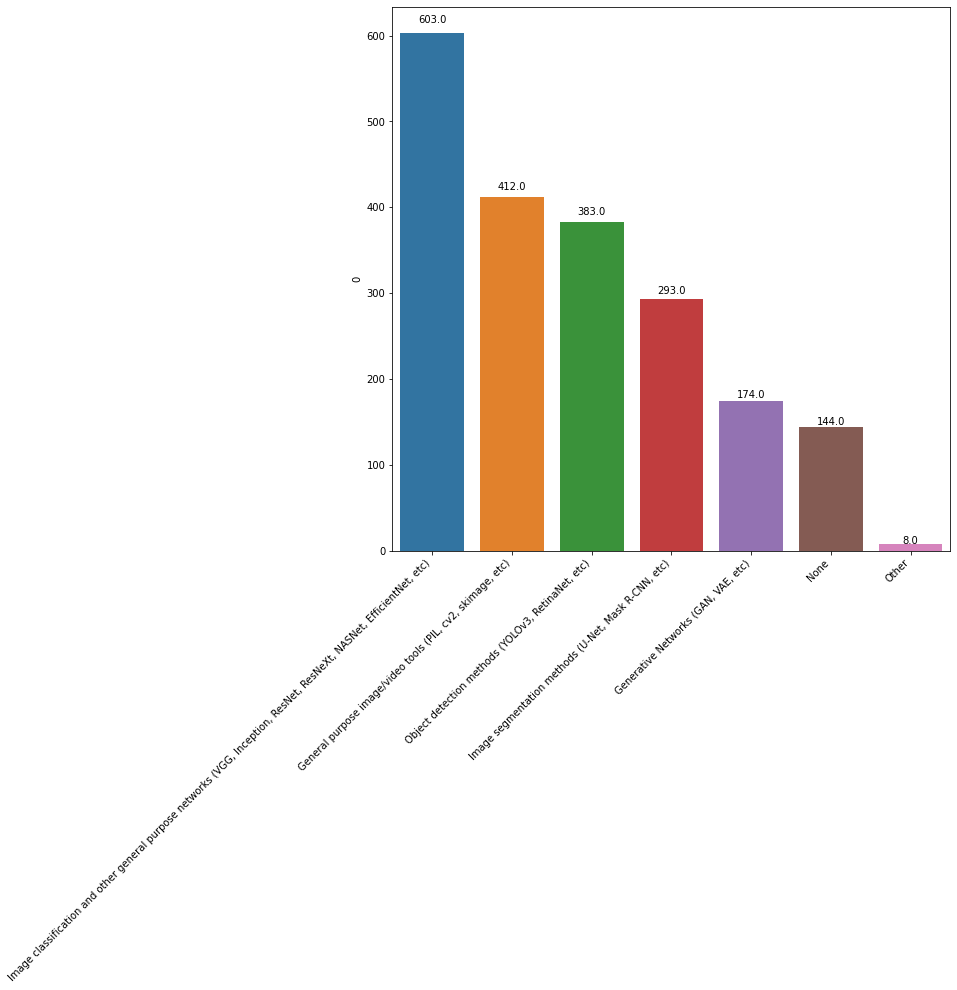

In [ ]:
plt.figure(figsize=(10,10))
Q18_count = Q18_data.value_counts().sort_values(ascending=False).to_frame()
ax = sns.barplot(x=Q18_count.index, y=Q18_count.iloc[:,0], data=Q18_count)
#ax = df_india.groupby(['Q6'])['Q6'].count().sort_values().plot(kind='bar')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')
plt.xticks(rotation=45, ha='right')

In [ ]:
Q19_columns = [df1821.Q19_Part_1,df1821.Q19_Part_2,df1821.Q19_Part_3,df1821.Q19_Part_4,
             df1821.Q19_Part_5,df1821.Q19_OTHER]
Q19_data = pd.concat(Q19_columns)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

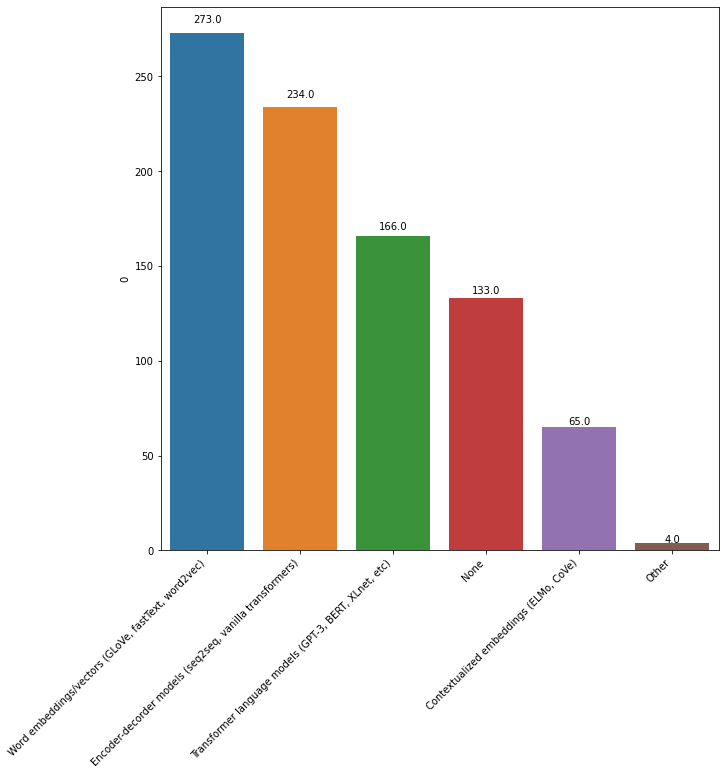

In [ ]:
plt.figure(figsize=(10,10))
Q19_count = Q19_data.value_counts().sort_values(ascending=False).to_frame()
ax = sns.barplot(x=Q19_count.index, y=Q19_count.iloc[:,0], data=Q19_count)
#ax = df_india.groupby(['Q6'])['Q6'].count().sort_values().plot(kind='bar')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')
plt.xticks(rotation=45, ha='right')

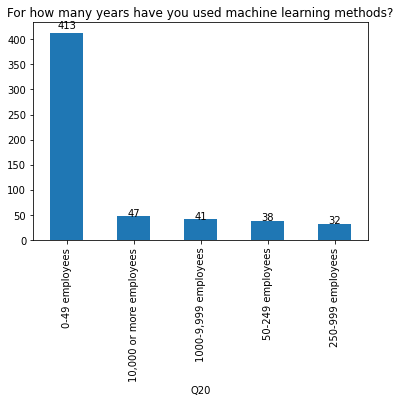

In [ ]:
ax = df1821.groupby(['Q20'])['Q20'].count().sort_values(ascending = False).plot(kind = 'bar',title = 'For how many years have you used machine learning methods?')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center');

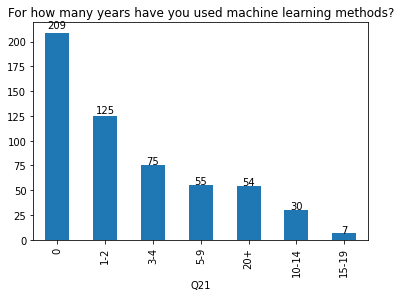

In [ ]:
ax = df1821.groupby(['Q21'])['Q21'].count().sort_values(ascending = False).plot(kind = 'bar',title = 'For how many years have you used machine learning methods?')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center');

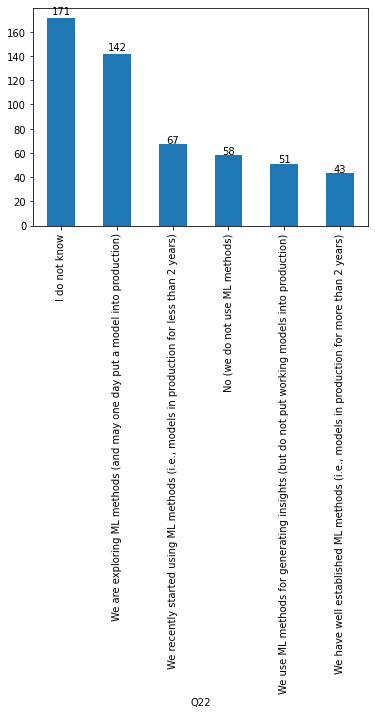

In [ ]:
ax = df1821.groupby(['Q22'])['Q22'].count().sort_values(ascending = False).plot(kind = 'bar',title = '')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center');

In [ ]:
Q23_columns = [df1821.Q23_Part_1,df1821.Q23_Part_2,df1821.Q23_Part_3,df1821.Q23_Part_4,
             df1821.Q23_Part_5,df1821.Q23_Part_6,df1821.Q23_Part_7,
             df1821.Q23_OTHER]
Q23_data = pd.concat(Q23_columns)



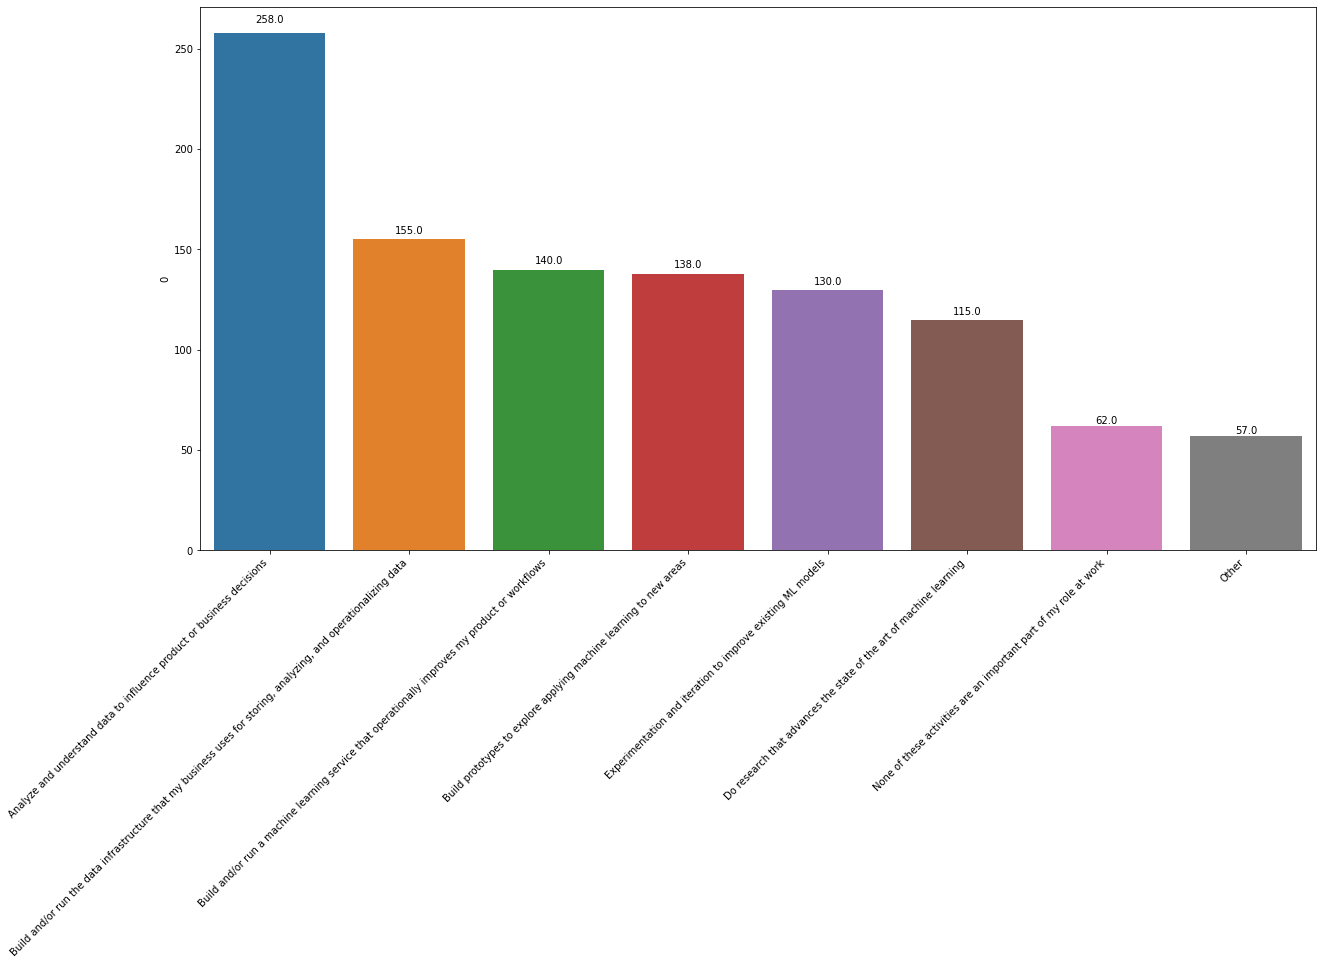

In [ ]:
plt.figure(figsize=(20,10))
Q23_count = Q23_data.value_counts().sort_values(ascending=False).to_frame()
ax = sns.barplot(x=Q23_count.index, y=Q23_count.iloc[:,0], data=Q23_count)
#ax = df_india.groupby(['Q6'])['Q6'].count().sort_values().plot(kind='bar')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')


plt.xticks(rotation=45, ha='right');


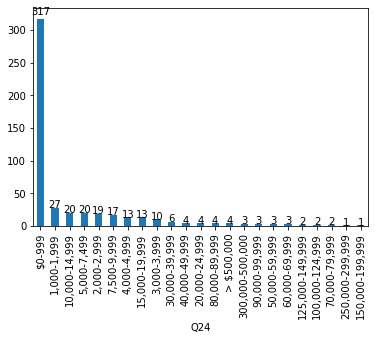

In [ ]:
ax = df1821.groupby(['Q24'])['Q24'].count().sort_values(ascending = False).plot(kind = 'bar',title = '')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center');

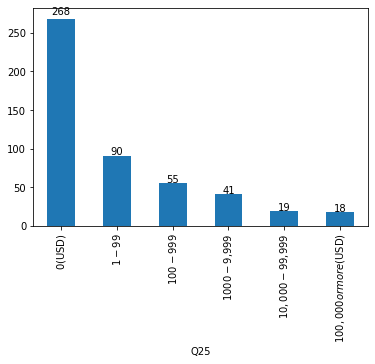

In [ ]:
ax = df1821.groupby(['Q25'])['Q25'].count().sort_values(ascending = False).plot(kind = 'bar',title = '')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center');

In [ ]:
Q26_A_columns = [df1821.Q26_A_Part_1,df1821.Q26_A_Part_2,df1821.Q26_A_Part_3,df1821.Q26_A_Part_4,
             df1821.Q26_A_Part_5,df1821.Q26_A_Part_6,df1821.Q26_A_Part_7,df1821.Q26_A_Part_8,
             df1821.Q26_A_Part_9, df1821.Q26_A_Part_10, df1821.Q26_A_Part_11,
             df1821.Q26_A_OTHER]
Q26_A_data = pd.concat(Q26_A_columns)


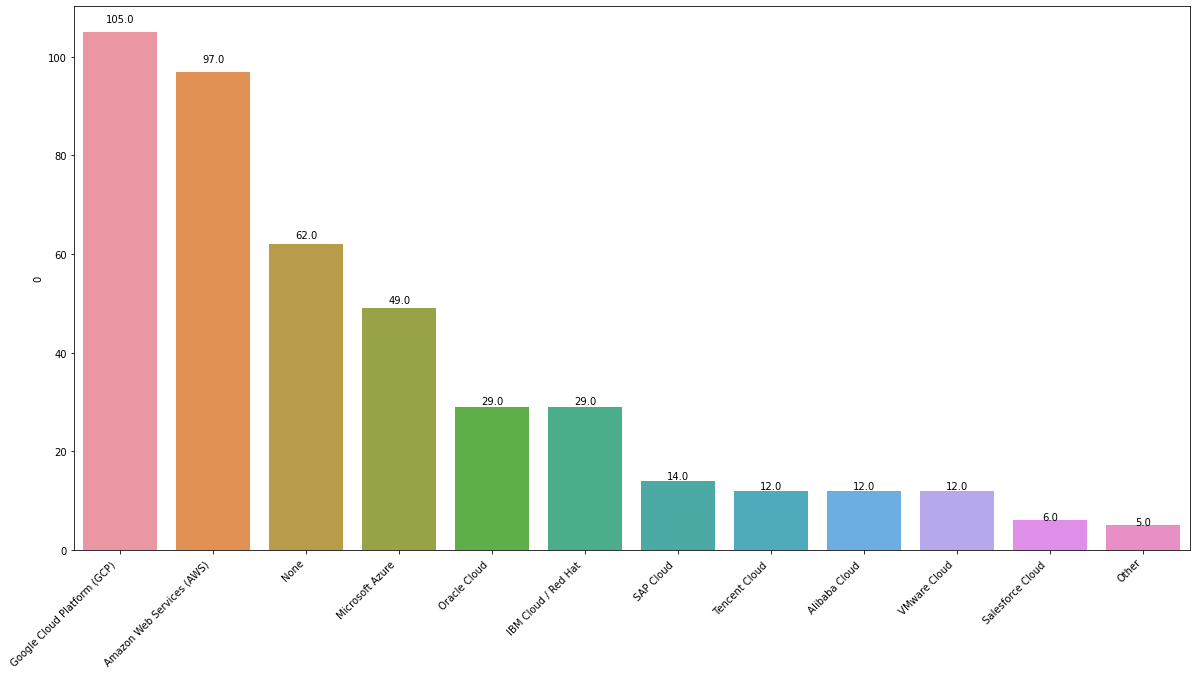

In [ ]:
plt.figure(figsize=(20,10))
Q26_A_count = Q26_A_data.value_counts().sort_values(ascending=False).to_frame()
ax = sns.barplot(x=Q26_A_count.index, y=Q26_A_count.iloc[:,0], data=Q26_A_count)
#ax = df_india.groupby(['Q6'])['Q6'].count().sort_values().plot(kind='bar')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')


plt.xticks(rotation=45, ha='right');


In [ ]:
Q27_A_columns = [df1821.Q27_A_Part_1,df1821.Q27_A_Part_2,df1821.Q27_A_Part_3,df1821.Q27_A_Part_4,
             df1821.Q27_A_Part_5,df1821.Q27_A_Part_6,df1821.Q27_A_Part_7,df1821.Q27_A_Part_8,
             df1821.Q27_A_Part_9, df1821.Q27_A_Part_10, df1821.Q27_A_Part_11,
             df1821.Q27_A_OTHER]
Q27_A_data = pd.concat(Q27_A_columns)


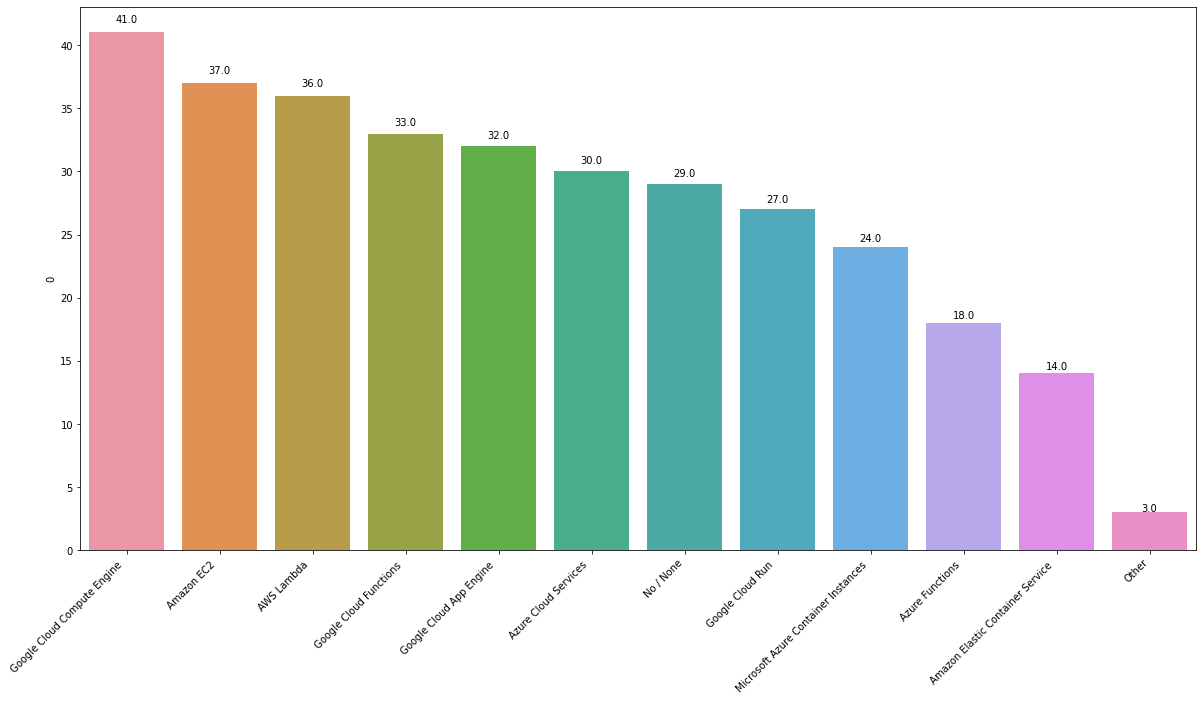

In [ ]:
plt.figure(figsize=(20,10))
Q27_A_count = Q27_A_data.value_counts().sort_values(ascending=False).to_frame()
ax = sns.barplot(x=Q27_A_count.index, y=Q27_A_count.iloc[:,0], data=Q27_A_count)
#ax = df_india.groupby(['Q6'])['Q6'].count().sort_values().plot(kind='bar')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')


plt.xticks(rotation=45, ha='right');


In [ ]:
Q28_A_columns = [df1821.Q28_A_Part_1,df1821.Q28_A_Part_2,df1821.Q28_A_Part_3,df1821.Q28_A_Part_4,
             df1821.Q28_A_Part_5,df1821.Q28_A_Part_6,df1821.Q28_A_Part_7,df1821.Q28_A_Part_8,
             df1821.Q28_A_Part_9, df1821.Q28_A_Part_10,
             df1821.Q28_A_OTHER]
Q28_A_data = pd.concat(Q28_A_columns)


''

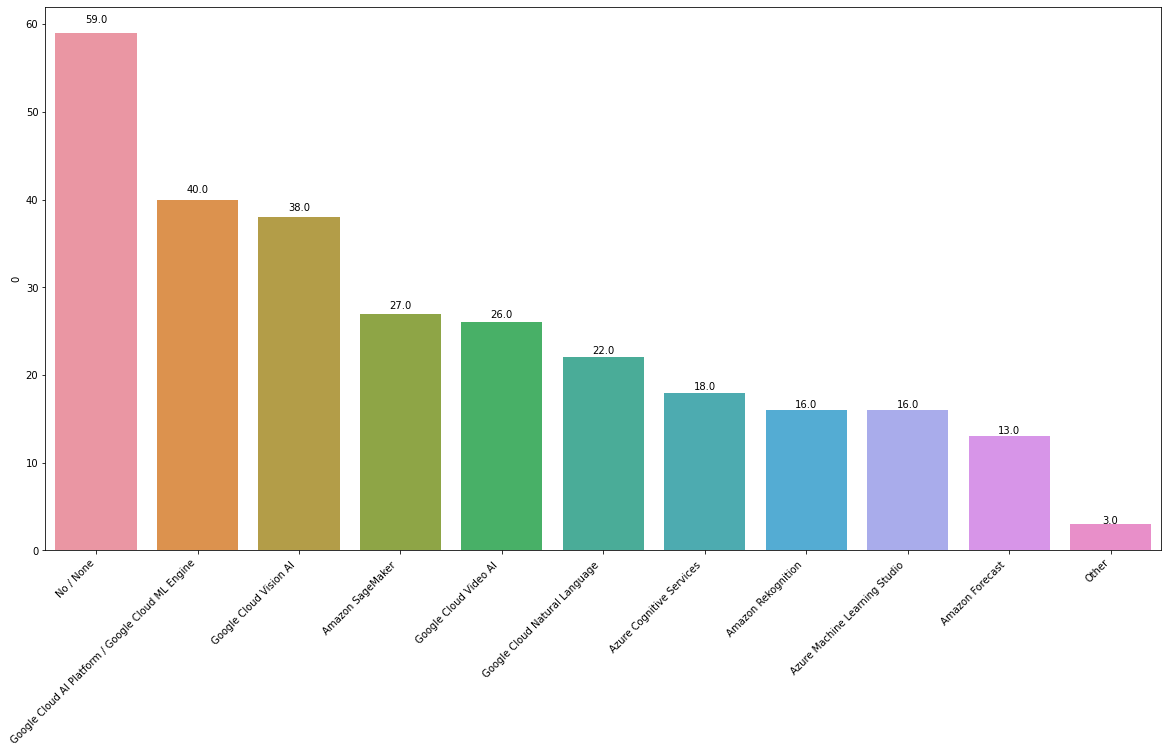

In [ ]:
plt.figure(figsize=(20,10))
Q28_A_count = Q28_A_data.value_counts().sort_values(ascending=False).to_frame()
ax = sns.barplot(x=Q28_A_count.index, y=Q28_A_count.iloc[:,0], data=Q28_A_count)
#ax = df_india.groupby(['Q6'])['Q6'].count().sort_values().plot(kind='bar')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')


plt.xticks(rotation=45, ha='right')
;

In [ ]:
Q29_A_columns = [df1821.Q29_A_Part_1,df1821.Q29_A_Part_2,df1821.Q29_A_Part_3,df1821.Q29_A_Part_4,
             df1821.Q29_A_Part_5,df1821.Q29_A_Part_6,df1821.Q29_A_Part_7,df1821.Q29_A_Part_8,
             df1821.Q29_A_Part_9, df1821.Q29_A_Part_10, df1821.Q29_A_Part_11,
             df1821.Q29_A_OTHER]
Q29_A_data = pd.concat(Q29_A_columns)


''

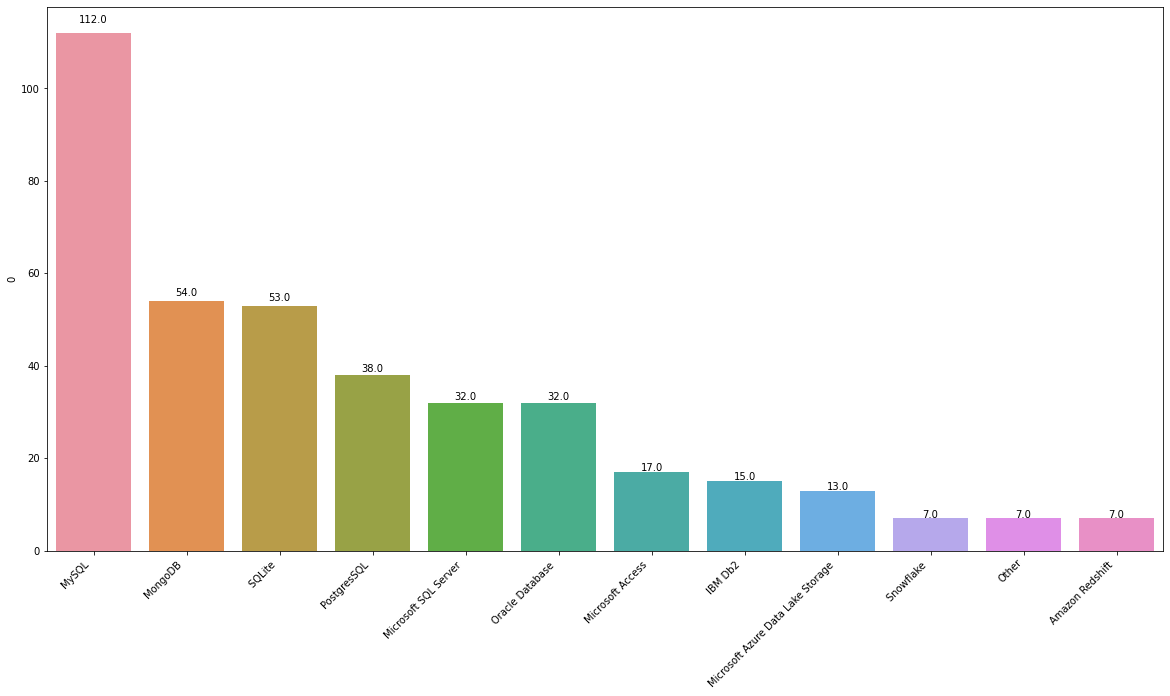

In [ ]:
plt.figure(figsize=(20,10))
Q29_A_count = Q29_A_data.value_counts().sort_values(ascending=False).to_frame()
ax = sns.barplot(x=Q29_A_count.index, y=Q29_A_count.iloc[:,0], data=Q29_A_count)
#ax = df_india.groupby(['Q6'])['Q6'].count().sort_values().plot(kind='bar')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')


plt.xticks(rotation=45, ha='right')
;

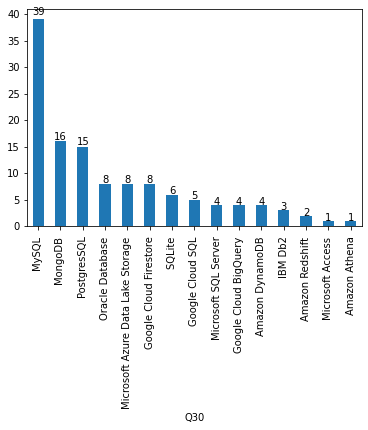

In [ ]:
ax = df1821.groupby(['Q30'])['Q30'].count().sort_values(ascending = False).plot(kind = 'bar',title = '')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center');

In [ ]:
Q31_A_columns = [df1821.Q31_A_Part_1,df1821.Q31_A_Part_2,df1821.Q31_A_Part_3,df1821.Q31_A_Part_4,
             df1821.Q31_A_Part_5,df1821.Q31_A_Part_6,df1821.Q31_A_Part_7,df1821.Q31_A_Part_8,
             df1821.Q31_A_Part_9, df1821.Q31_A_Part_10, df1821.Q31_A_Part_11,
             df1821.Q31_A_OTHER]
Q31_A_data = pd.concat(Q31_A_columns)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

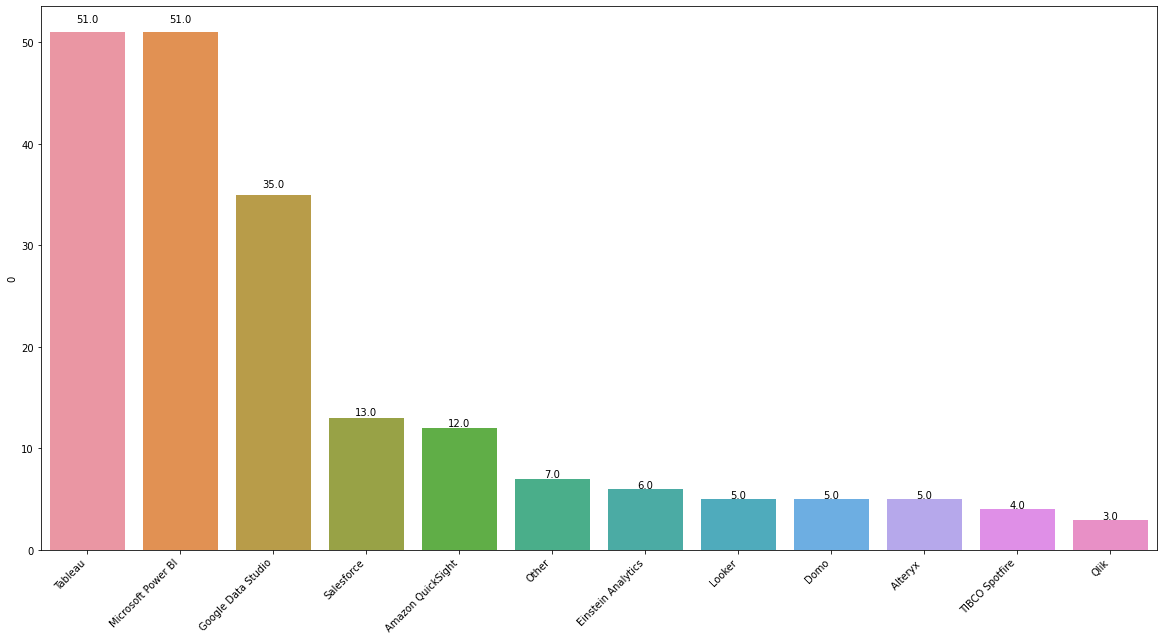

In [ ]:
plt.figure(figsize=(20,10))
Q31_A_count = Q31_A_data.value_counts().sort_values(ascending=False).to_frame()
ax = sns.barplot(x=Q31_A_count.index, y=Q31_A_count.iloc[:,0], data=Q31_A_count)
#ax = df_india.groupby(['Q6'])['Q6'].count().sort_values().plot(kind='bar')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')


plt.xticks(rotation=45, ha='right')


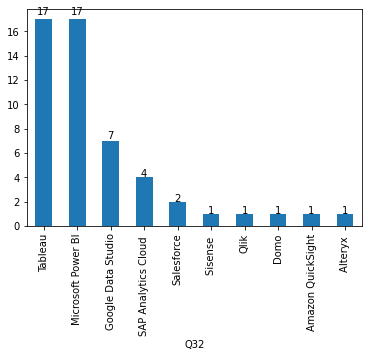

In [ ]:
ax = df1821.groupby(['Q32'])['Q32'].count().sort_values(ascending = False).plot(kind = 'bar',title = '')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center');

In [ ]:
Q33_A_columns = [df1821.Q33_A_Part_1,df1821.Q33_A_Part_2,df1821.Q33_A_Part_3,df1821.Q33_A_Part_4,
             df1821.Q33_A_Part_5,df1821.Q33_A_Part_6,df1821.Q33_A_Part_7,
             df1821.Q33_A_OTHER]
Q33_A_data = pd.concat(Q33_A_columns)


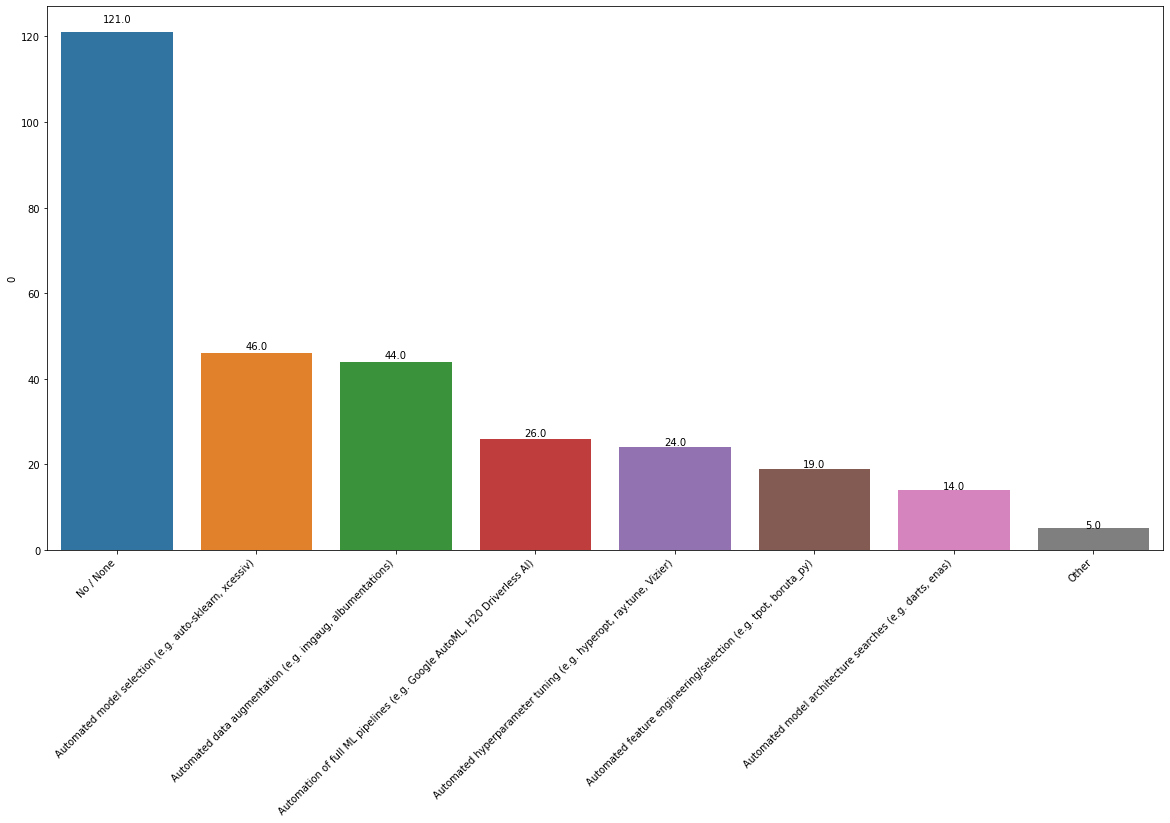

In [ ]:
plt.figure(figsize=(20,10))
Q33_A_count = Q33_A_data.value_counts().sort_values(ascending=False).to_frame()
ax = sns.barplot(x=Q33_A_count.index, y=Q33_A_count.iloc[:,0], data=Q33_A_count)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')


plt.xticks(rotation=45, ha='right');


In [ ]:
Q34_A_columns = [df1821.Q34_A_Part_1,df1821.Q34_A_Part_2,df1821.Q34_A_Part_3,df1821.Q34_A_Part_4,
             df1821.Q34_A_Part_5,df1821.Q34_A_Part_6,df1821.Q34_A_Part_7,df1821.Q34_A_Part_8,
             df1821.Q34_A_Part_9, df1821.Q34_A_Part_10, df1821.Q34_A_Part_11,
             df1821.Q34_A_OTHER]
Q34_A_data = pd.concat(Q34_A_columns)


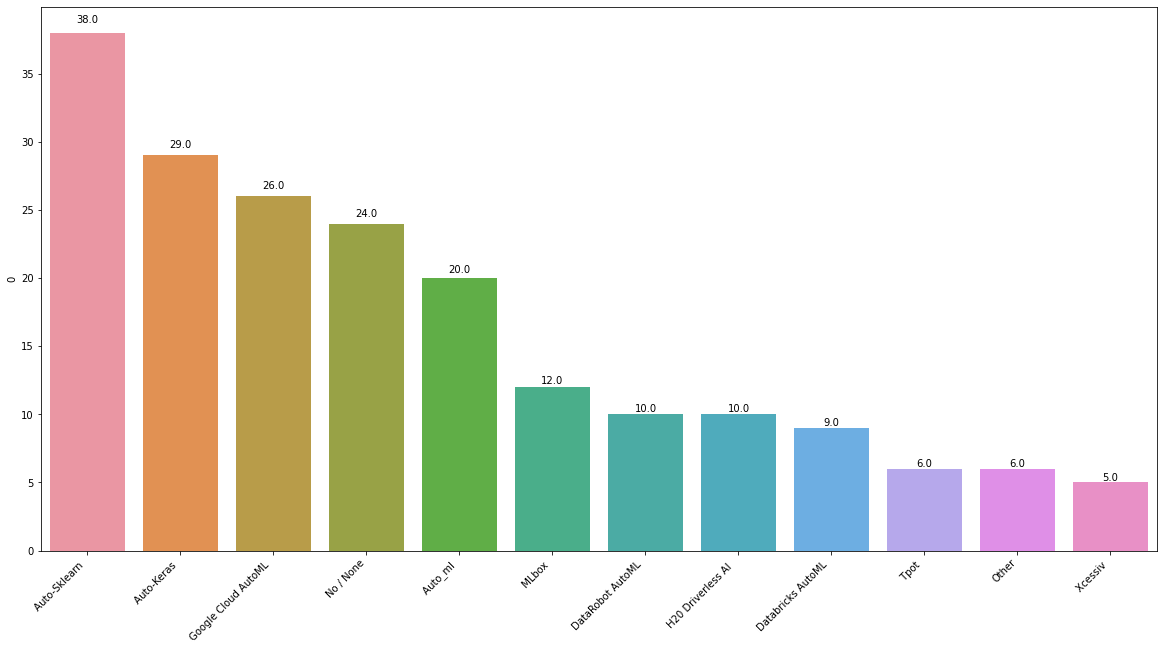

In [ ]:
plt.figure(figsize=(20,10))
Q34_A_count = Q34_A_data.value_counts().sort_values(ascending=False).to_frame()
ax = sns.barplot(x=Q34_A_count.index, y=Q34_A_count.iloc[:,0], data=Q34_A_count)
#ax = df_india.groupby(['Q6'])['Q6'].count().sort_values().plot(kind='bar')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')


plt.xticks(rotation=45, ha='right');


In [ ]:
Q35_A_columns = [df1821.Q35_A_Part_1,df1821.Q35_A_Part_2,df1821.Q35_A_Part_3,df1821.Q35_A_Part_4,
             df1821.Q35_A_Part_5,df1821.Q35_A_Part_6,df1821.Q35_A_Part_7,df1821.Q35_A_Part_8,
             df1821.Q35_A_Part_9, df1821.Q35_A_Part_10,
             df1821.Q35_A_OTHER]
Q35_A_data = pd.concat(Q35_A_columns)



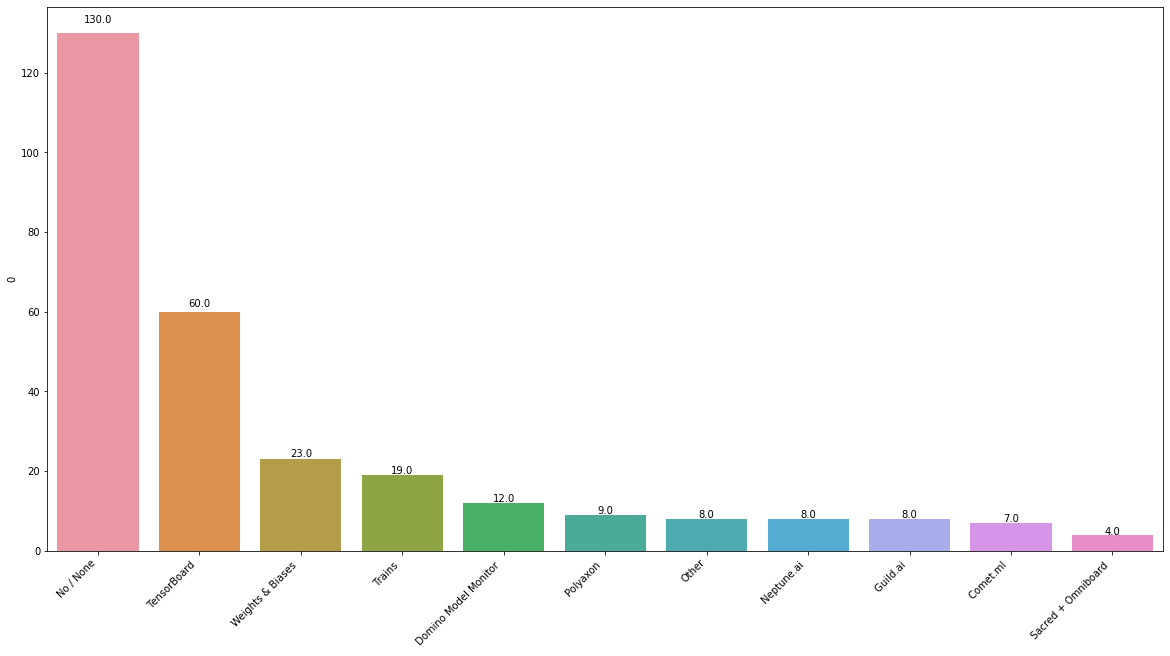

In [ ]:
plt.figure(figsize=(20,10))
Q35_A_count = Q35_A_data.value_counts().sort_values(ascending=False).to_frame()
ax = sns.barplot(x=Q35_A_count.index, y=Q35_A_count.iloc[:,0], data=Q35_A_count)
#ax = df_india.groupby(['Q6'])['Q6'].count().sort_values().plot(kind='bar')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')


plt.xticks(rotation=45, ha='right');


In [ ]:
df1821.groupby(['Q21'])['Q21'].count().sort_values(ascending = False)[0]

209

In [ ]:
#ax = plt.bar(x=Q17_count.index, height=Q17_count.iloc[:,0], data=Q17_count)
print(Q17_count.max()[0])

1628


# Getting results of maximum values for the one answer questions

In [ ]:

list =['Q2','Q3','Q4','Q5','Q6','Q8','Q11','Q15','Q20','Q21','Q22','Q24','Q25','Q30','Q32']
max_output = []
dict ={}
for x in list:
  max_output.append(df.groupby([str(x)])[str(x)].count().sort_values(ascending = False)[0])
  dict[str(x)] = df.groupby([str(x)])[str(x)].count().sort_values(ascending = False)[0]




In [ ]:
print(dict)

{'Q2': 15789, 'Q3': 5851, 'Q4': 7859, 'Q5': 5171, 'Q6': 4546, 'Q8': 14241, 'Q11': 13348, 'Q15': 6312, 'Q20': 4208, 'Q21': 2645, 'Q22': 2353, 'Q24': 2128, 'Q25': 3856, 'Q30': 764, 'Q32': 540}


In [ ]:
df.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5',
       'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9',
       'Q35_B_Part_10', 'Q35_B_OTHER'],
      dtype='object', length=355)

India with almost 30% constitutes the majority of the participants of the survey

In [ ]:
# Removing the unwanted column
df = df.loc[df['Q4'] != 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?']

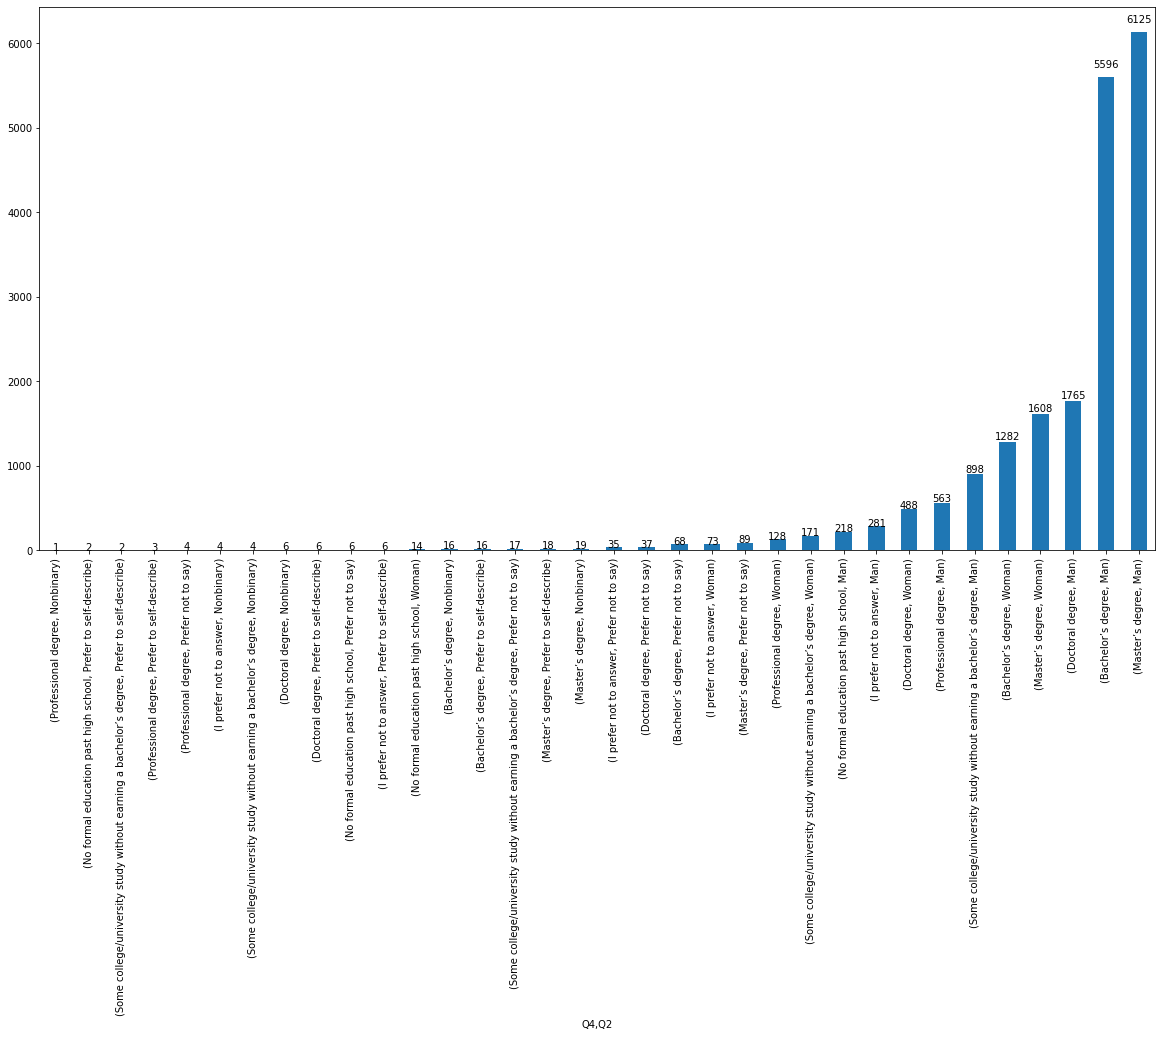

In [ ]:
plt.figure(figsize=(20,10))
ax = df.groupby(['Q4','Q2'])['Q2'].count().sort_values().plot(kind='bar')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

In [ ]:
df.describe()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
count,20036,20036,20036,20036,19569,19277,19120,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945,17821,11211,3826,2445,5873,5099,3290,3132,2452,1502,1604,386,1162,5992,6329,857,180,2072,105,846,...,556,577,181,181,343,203,1006,2115,180,2428,2540,3274,1510,2397,3161,2108,188,2479,859,801,833,446,2384,2752,1348,315,707,804,193,935,1177,494,430,3199,557,480,846,519,3082,251
unique,5167,11,5,55,7,13,7,1,1,1,1,1,1,1,1,1,1,1,1,1,13,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,565,25-29,Man,India,Master’s degree,Student,3-5 years,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",RStudio,Visual Studio,Visual Studio Code (VSCode),PyCharm,Spyder,Notepad++,Sublime Text,Vim / Emacs,MATLAB,None,Other,Kaggle Notebooks,Colab Notebooks,Azure Notebooks,Paperspace / Gradient,Binder / JupyterHub,Code Ocean,IBM Watson Studio,...,Einstein Analytics,Qlik,Domo,TIBCO Spotfire,Alteryx,Sisense,SAP Analytics Cloud,None,Other,"Automated data augmentation (e.g. imgaug, albu...",Automated feature engineering/selection (e.g. ...,"Automated model selection (e.g. auto-sklearn, ...",Automated model architecture searches (e.g. da...,Automated hyperparameter tuning (e.g. hyperopt...,Automation of full ML pipelines (e.g. Google C...,None,Other,Google Cloud AutoML,H20 Driverless AI,Databricks AutoML,DataRobot AutoML,Tpot,Auto-Keras,Auto-Sklearn,Auto_ml,Xcessiv,MLbox,None,Other,Neptune.ai,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,Trains,Domino Model Monitor,None,Other
freq,34,4011,15789,5851,7859,5171,4546,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945,14241,11211,3826,2445,5873,5099,3290,3132,2452,1502,1604,386,1162,5992,6329,857,180,2072,105,846,...,556,577,181,181,343,203,1006,2115,180,2428,2540,3274,1510,2397,3161,2108,188,2479,859,801,833,446,2384,2752,1348,315,707,804,193,935,1177,494,430,3199,557,480,846,519,3082,251


In [ ]:
df.isna().sum().sort_values(ascending=False)

Q34_A_Part_9                           19992
Q31_A_Part_9                           19980
Q35_A_Part_4                           19979
Q31_A_Part_12                          19975
Q35_A_Part_6                           19970
                                       ...  
Q4                                       467
Q3                                         0
Q2                                         0
Q1                                         0
Time from Start to Finish (seconds)        0
Length: 355, dtype: int64

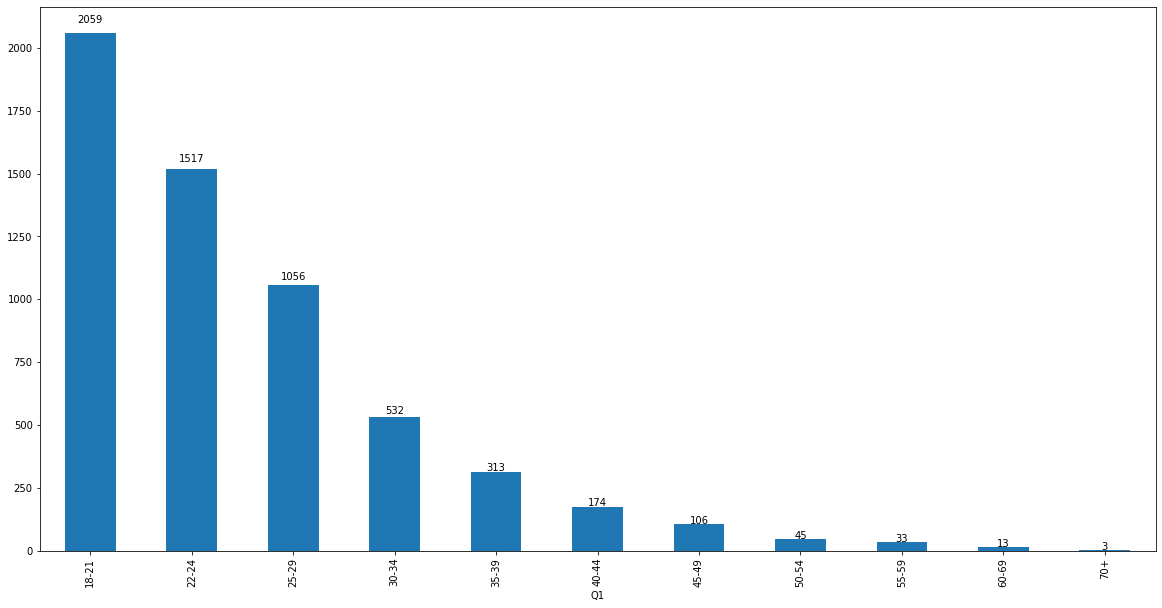

In [ ]:
plt.figure(figsize=(20,10))
df_india = df[df['Q3']== 'India']
ax = df_india.groupby(['Q1'])['Q1'].count().plot(kind='bar')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

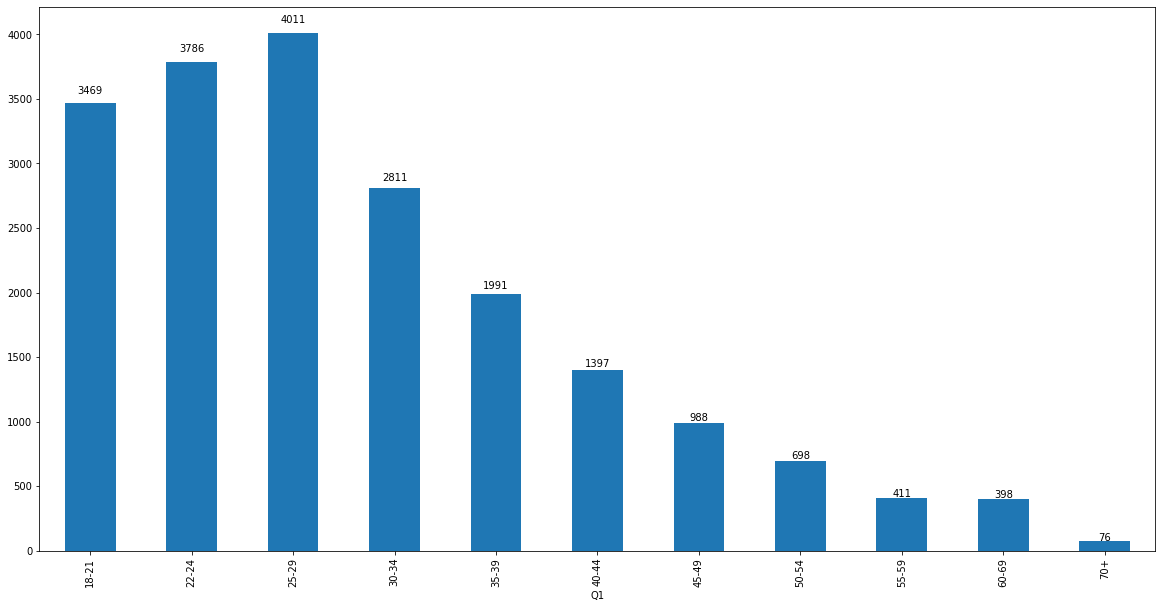

In [ ]:
plt.figure(figsize=(20,10))

ax = df.groupby(['Q1'])['Q1'].count().plot(kind='bar')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<Figure size 1440x720 with 0 Axes>

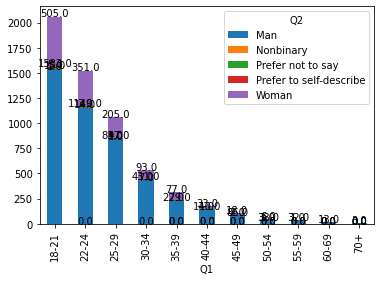

In [ ]:
# Here I want o seperate the genders 
%matplotlib inline
plt.figure(figsize=(20,10))
df_india['Man'] = df_india['Q2']
ax = df_india.groupby(['Q1','Q2'])['Q2'].count().unstack('Q2').plot(kind='bar',stacked=True)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<Figure size 1440x1080 with 0 Axes>

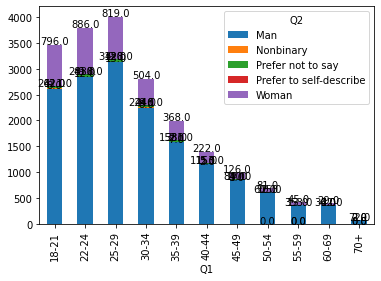

In [ ]:
# Here I want o seperate the genders 
%matplotlib inline
plt.figure(figsize=(20,15))
df_india['Man'] = df_india['Q2']
ax = df.groupby(['Q1','Q2'])['Q2'].count().unstack('Q2').plot(kind='bar',stacked=True)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center');

In [ ]:
dfis = df_india[df_india['Q5'] =='Student']
dfns = df_india[df_india['Q5'] !='Student']
print(dfis.shape)
dfis.isna().sum()
dfis = dfis.dropna(axis=1,how='all')
dfis = dfis[dfis.isnull().sum(axis=1) > 0]
dfis.isna().sum()

(2242, 356)


Time from Start to Finish (seconds)       0
Q1                                        0
Q2                                        0
Q3                                        0
Q4                                        0
                                       ... 
Q35_B_Part_8                           2087
Q35_B_Part_9                           2153
Q35_B_Part_10                          1878
Q35_B_OTHER                            2203
Man                                       0
Length: 232, dtype: int64

In [ ]:
dfis.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,Man
11,7469,18-21,Man,India,Bachelor’s degree,Student,1-2 years,Python,R,SQL,C,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Man
16,413,18-21,Woman,India,Bachelor’s degree,Student,1-2 years,NaN,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,NaN,RStudio,NaN,NaN,NaN,NaN,Notepad++,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,Woman
19,192,22-24,Man,India,Bachelor’s degree,Student,1-2 years,Python,NaN,SQL,C,C++,NaN,Javascript,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,Visual Studio,Visual Studio Code (VSCode),PyCharm,NaN,Notepad++,Sublime Text,NaN,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Man
20,267,18-21,Man,India,Bachelor’s degree,Student,1-2 years,Python,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,NaN,NaN,NaN,NaN,C++,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,Visual Studio Code (VSCode),PyCharm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Man
27,433,18-21,Man,India,Bachelor’s degree,Student,3-5 years,Python,NaN,NaN,C,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,Visual Studio,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated data augmentation (e.g. imgaug, albu...",NaN,"Automated model selection (e.g. auto-sklearn, ...",Automated model architecture searches (e.g. da...,NaN,NaN,NaN,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN,Auto-Sklearn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,Man


In [ ]:
q7_columns = [df_india.Q7_Part_1,df_india.Q7_Part_2,df_india.Q7_Part_3,df_india.Q7_Part_4,
             df_india.Q7_Part_5,df_india.Q7_Part_6,df_india.Q7_Part_7,df_india.Q7_Part_8,
             df_india.Q7_Part_9, df_india.Q7_Part_10, df_india.Q7_Part_11, df_india.Q7_Part_12,
             df_india.Q7_OTHER]
Q7_data = pd.concat(q7_columns)


6        Python
11       Python
16          NaN
19       Python
20       Python
          ...  
20015       NaN
20024       NaN
20028       NaN
20031       NaN
20035       NaN
Length: 76063, dtype: object


In [ ]:
# Here what I would like to check is which age group , job group etc. prefers which language /IDE ...

q7_column = ['Q7_Part_1','Q7_Part_2']

list = []

for q7_columns in q7_column:
  a = (df_india.groupby(['Q1',q7_columns])[q7_columns].count())
  list.append(a)

print(list)

[Q1     Q7_Part_1
18-21  Python       1752
22-24  Python       1265
25-29  Python        822
30-34  Python        386
35-39  Python        216
40-44  Python        130
45-49  Python         75
50-54  Python         37
55-59  Python         22
60-69  Python         11
70+    Python          2
Name: Q7_Part_1, dtype: int64, Q1     Q7_Part_2
18-21  R            227
22-24  R            266
25-29  R            206
30-34  R            113
35-39  R             61
40-44  R             47
45-49  R             28
50-54  R              9
55-59  R             10
60-69  R              4
70+    R              3
Name: Q7_Part_2, dtype: int64]


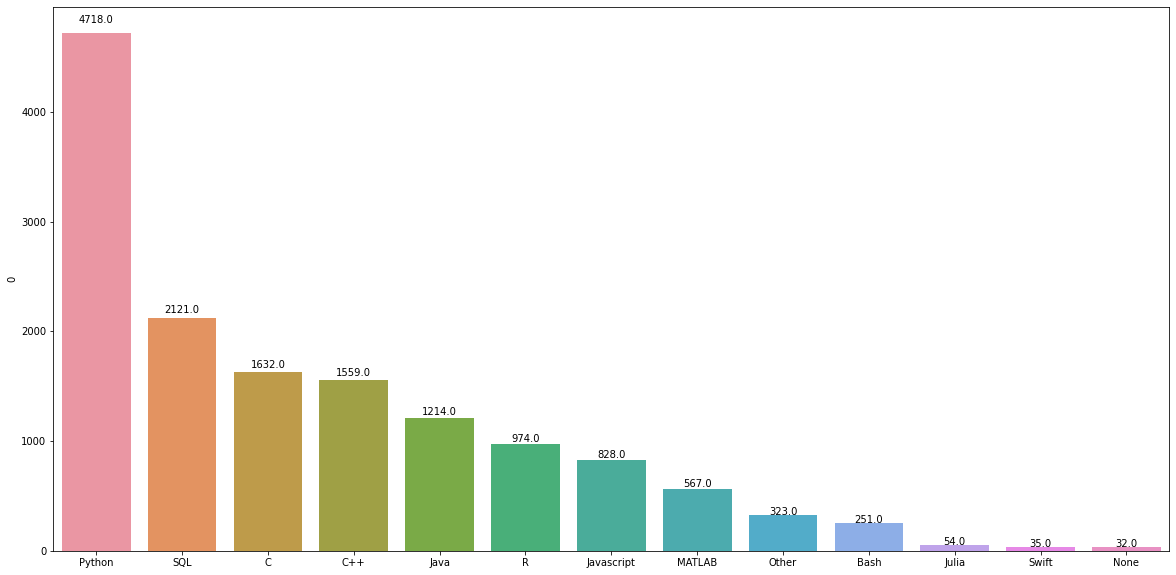

In [ ]:
plt.figure(figsize=(20,10))
Q7_count = Q7_data.value_counts().sort_values(ascending=False).to_frame()
ax = sns.barplot(x=Q7_count.index, y=Q7_count.iloc[:,0], data=Q7_count)
#ax = df_india.groupby(['Q6'])['Q6'].count().sort_values().plot(kind='bar')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

India, which constitutes the major part of the survey has more young users between 18 to 24  

So let us figure out why there are more young users and what are their occupations and habits

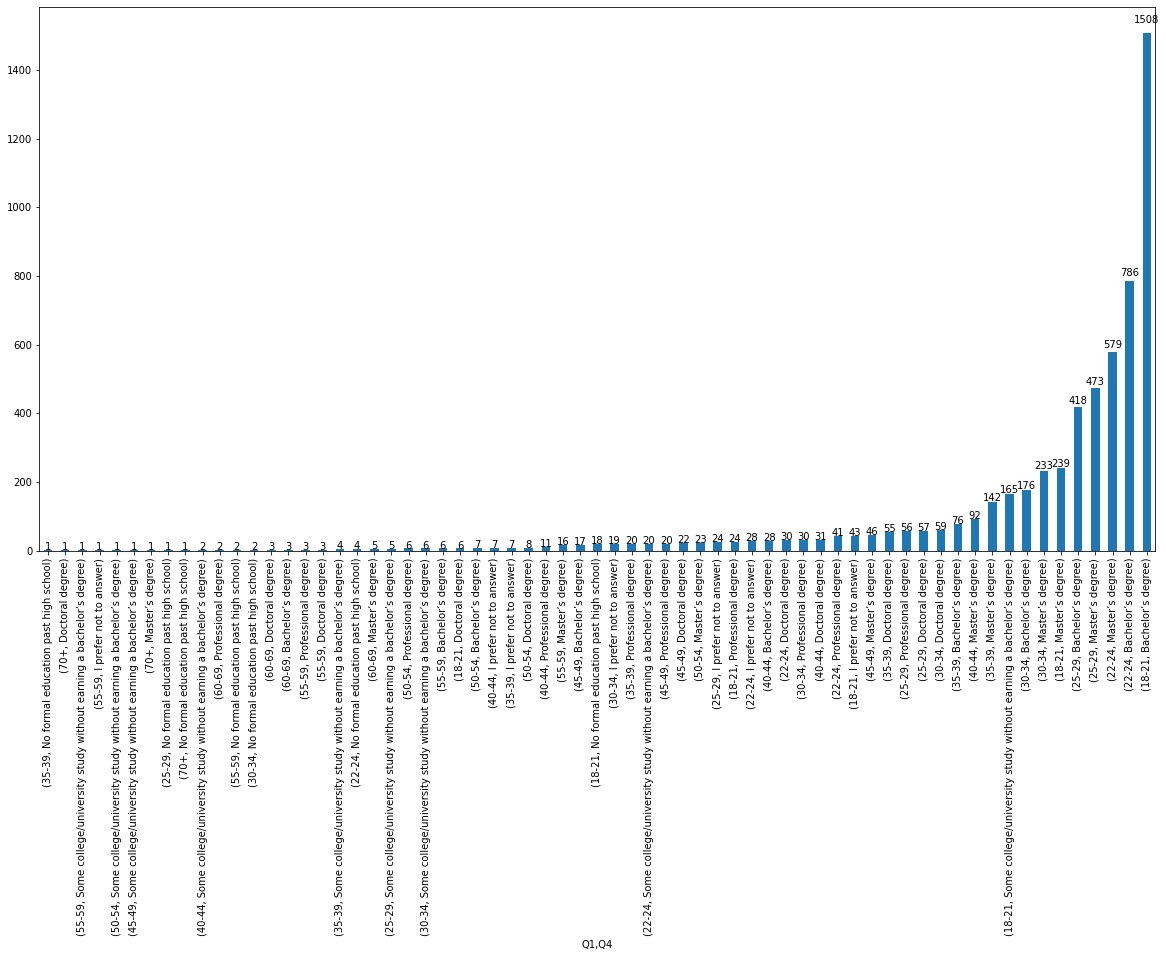

In [ ]:
plt.figure(figsize=(20,10))
ax = df_india.groupby(['Q1','Q4'])['Q4'].count().sort_values().plot(kind='bar')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

In [ ]:
plt.figure(figsize=(25,10))
df_india.groupby(['Q1','Q5'])['Q5'].count().sort_values(ascending=False)
# for p in ax.patches:
#     width = p.get_width()
#     height = p.get_height()
#     x, y = p.get_xy() 
#     ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
#     #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

Q1     Q5                    
18-21  Student                   1568
22-24  Student                    514
       Software Engineer          232
       Currently not employed     219
25-29  Data Scientist             166
                                 ... 
45-49  Statistician                 1
70+    Data Scientist               1
45-49  Data Analyst                 1
40-44  Statistician                 1
70+    Other                        1
Name: Q5, Length: 119, dtype: int64

<Figure size 1800x720 with 0 Axes>

students from age 18-21 , which means Bachelor students and 22-24 ,meaning students pursuing Masters constitute a major portion of Kaggle users in India

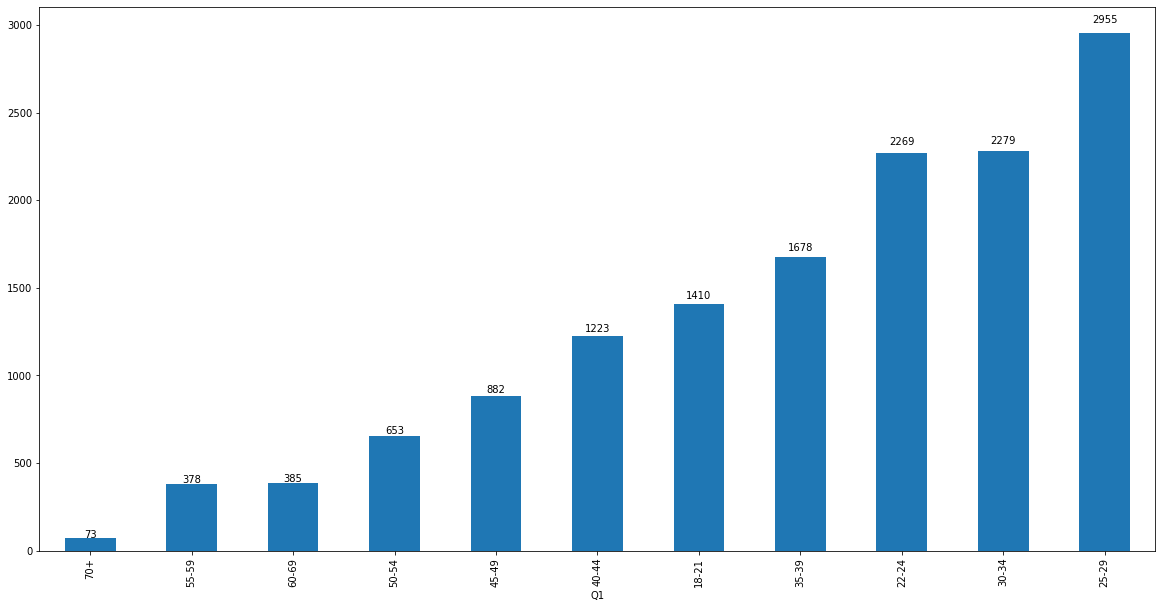

In [ ]:
plt.figure(figsize=(20,10))
df_world = df[df['Q3']!= 'India']
ax = df_world.groupby(['Q1'])['Q1'].count().sort_values().plot(kind='bar')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    #ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')